In [83]:
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [2]:
path = "./data/SergioIoppolo-November2023/20231104  hexane/"

In [3]:
bkgd_fname1 = path + "R73861.d01"
sample_fname1 = path + "R73873.d01"

bkgd_fname2 = path + "R73861.d02"
sample_fname2 = path + "R73873.d02"

bkgd_fname3 = path + "R73862.d01"
sample_fname3 = path + "R73874.d01"

bkgd_fname4 = path + "R73862.d02"
sample_fname4 = path + "R73874.d02"

### SingleScan objects

In [4]:
test_scan1 = tools.SingleScan(bkgd_fname1, sample_fname1)
test_scan2 = tools.SingleScan(bkgd_fname2, sample_fname2)
test_scan3 = tools.SingleScan(bkgd_fname3, sample_fname3)
test_scan4 = tools.SingleScan(bkgd_fname4, sample_fname4)

(-0.02, 0.8)

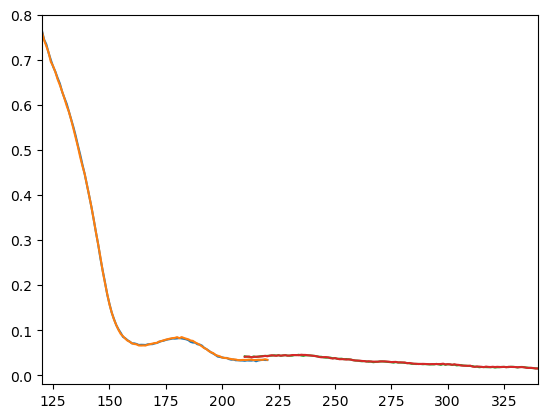

In [5]:
fig, ax = plt.subplots(1, 1)

ax.plot(test_scan1.data['wavelength'], test_scan1.data['absorbance'])
ax.plot(test_scan2.data['wavelength'], test_scan2.data['absorbance'])
ax.plot(test_scan3.data['wavelength'], test_scan3.data['absorbance'])
ax.plot(test_scan4.data['wavelength'], test_scan4.data['absorbance'])

ax.set_xlim(120, 340)
ax.set_ylim(-0.02, 0.8)

### Spectrum objects

In [6]:
bkgd_fname1 = path + "R73861.d01"
sample_fname1 = path + "R73873.d01"

bkgd_fname2 = path + "R73861.d02"
sample_fname2 = path + "R73873.d02"

# action, pressing "ok" in the edit window:

test_spectrum = tools.Spectrum()
test_spectrum.change_name("73873")
test_spectrum.add_bkgd(bkgd_fname1)
test_spectrum.add_bkgd(bkgd_fname2)
test_spectrum.add_sample(sample_fname1)
test_spectrum.add_sample(sample_fname2)
test_spectrum.change_color("#000001")
test_spectrum.change_offset(0.00001)
test_spectrum.average_scans()
#tools.plot_absorbance([test_spectrum])

In [7]:
#test_spectrum.flip_visibility()

In [8]:
test_spectrum.change_color("#FF0000")

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


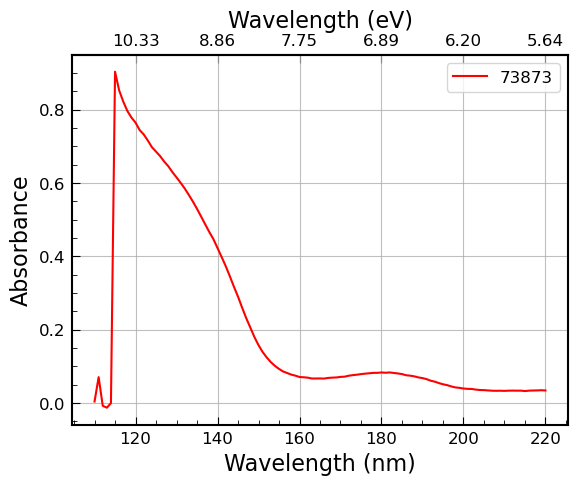

In [9]:
tools.plot_absorbance([test_spectrum])#, xlim=(120, 340), ylim=(-0.02, 0.8))

In [10]:
test_spectrum.data['absorbance']

0      0.003893
1      0.070372
2     -0.007720
3     -0.012925
4     -0.000565
         ...   
106    0.033585
107    0.033956
108    0.034200
109    0.034710
110    0.034000
Name: absorbance, Length: 111, dtype: float64

In [11]:
bkgd_fname1 = path + "R73861.d01"
sample_fname1 = path + "R73873.d01"

bkgd_fname2 = path + "R73861.d02"
sample_fname2 = path + "R73873.d02"

# action, pressing "ok" in the edit window:

spec1 = tools.Spectrum()
spec1.change_name("73873")
spec1.add_bkgd(bkgd_fname1)
spec1.add_bkgd(bkgd_fname2)
spec1.add_sample(sample_fname1)
spec1.add_sample(sample_fname2)
spec1.change_color("#000001")
spec1.change_offset(0.0)
spec1.average_scans()
#tools.plot_absorbance([test_spectrum])


bkgd_fname1 = path + "R73862.d01"
sample_fname1 = path + "R73874.d01"

bkgd_fname2 = path + "R73862.d02"
sample_fname2 = path + "R73874.d02"

# action, pressing "ok" in the edit window:

spec2 = tools.Spectrum()
spec2.change_name("73874")
spec2.add_bkgd(bkgd_fname1)
spec2.add_bkgd(bkgd_fname2)
spec2.add_sample(sample_fname1)
spec2.add_sample(sample_fname2)
spec2.change_color("#000001")
spec2.change_offset(0.0)
spec2.average_scans()
#tools.plot_absorbance([test_spectrum])

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


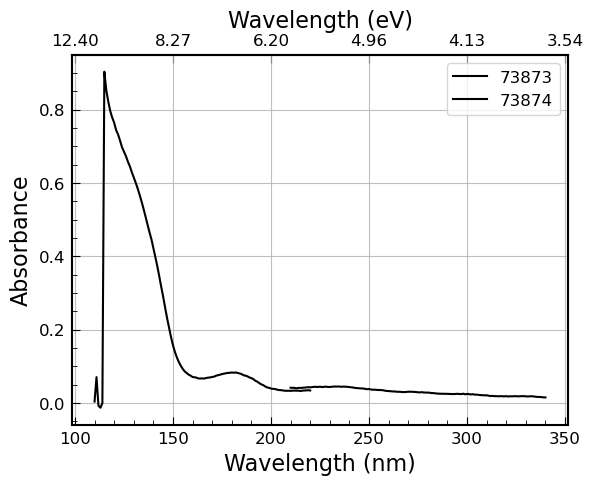

In [12]:
tools.plot_absorbance([spec1, spec2])

In [13]:
tester = tools.StichedSpectrum(spec1, spec2)

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


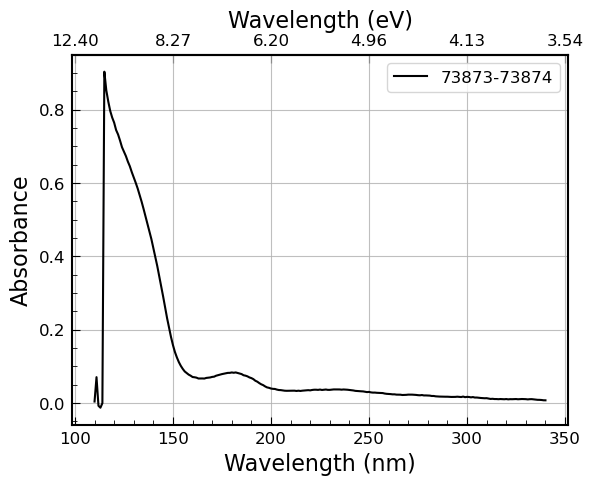

In [14]:
tools.plot_absorbance([tester])

In [15]:
tester.save_to_csv("./hexane_irradiation_1.csv")

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


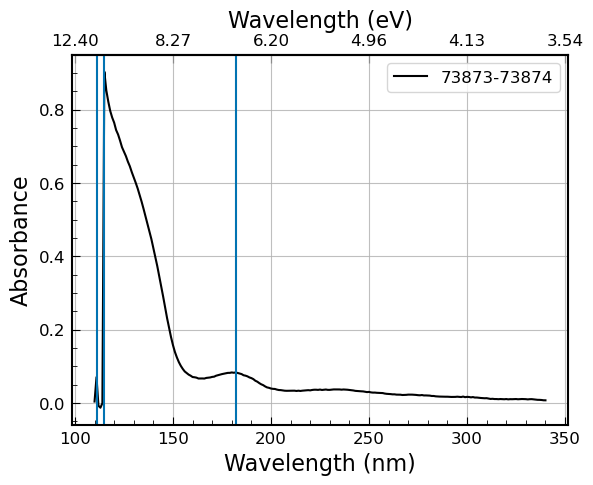

In [16]:
# note, this is not the most robust way to find the peaks.
# What you should do when you implement this, is fit the function
# with several asymmetric gaussians (must be asymmetric or it won't work)
# and then take the peaks of those gaussians. This is much more robust
# against noise, which in general might be high.

from scipy.signal import find_peaks
peaki = find_peaks(tester.data['absorbance'], prominence=0.005)
peaks = []
for i in peaki[0]:
    this_wl = tester.data['wavelength'][i]
    this_ab = tester.data['absorbance'][i]
    peaks.append([this_wl, this_ab])
    
tools.plot_absorbance([tester], peaks=peaks)

## Have a look at the oxy data why not

In [1]:
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = './data/AlessandraMigliorini-October2023/DATA_Oct2023/20231024    O2_CH3OH   Layer  VIS OK/'

In [2]:
spec = tools.Spectrum()
spec.change_name("73666")
spec.add_bkgd(path + "R73661.d01")
spec.add_bkgd(path + "R73661.d02")
spec.add_bkgd(path + "R73661.d03")
spec.add_bkgd(path + "R73661.d04")
spec.add_sample(path + "R73666.d01")
spec.add_sample(path + "R73666.d02")
spec.add_sample(path + "R73666.d03")
spec.add_sample(path + "R73666.d04")
spec.change_color("#000001")
spec.change_offset(0.0)
spec.average_scans()

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


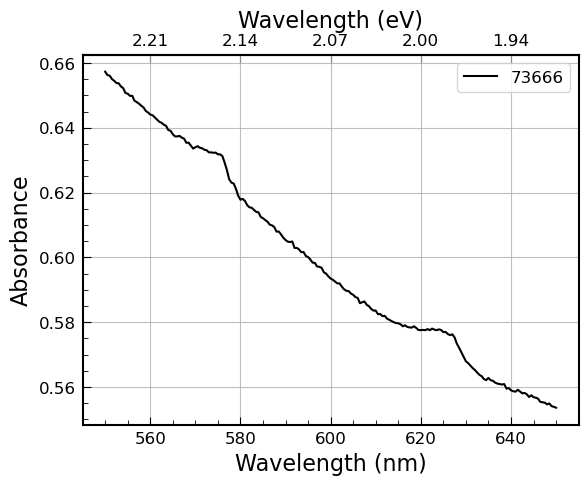

In [3]:
tools.plot_absorbance([spec])

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


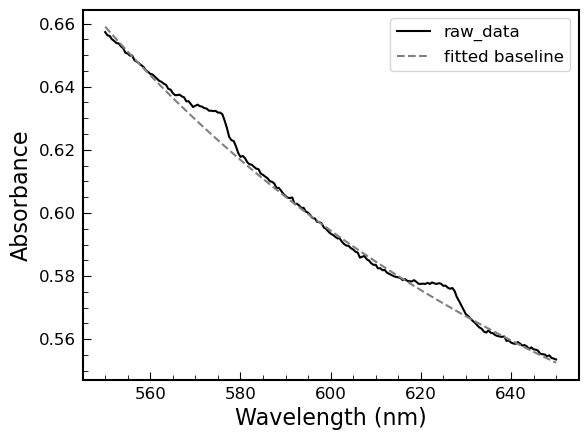

In [8]:
spec.subtract_baseline([(550, 565), (585, 610), (635, 650)],
                       p0=[10**9, 0.5, 1])

fig, ax = plt.subplots(1, 1)
ax.plot(spec.data['wavelength'], spec.data['raw_absorbance'],
        color='black', label='raw_data')
ax.plot(spec.data['wavelength'], spec.data['baseline'],
        color='grey', label='fitted baseline', linestyle = '--')
ax.legend()
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Absorbance");

In [5]:
spec.baseline_p

array([5.67446133e+09, 4.44151953e-01, 3.35606487e+00])

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


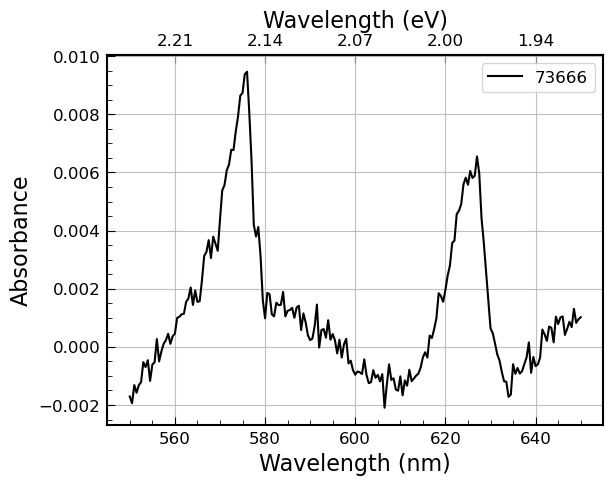

In [9]:
tools.plot_absorbance([spec])

those extra wiggles are likely physical, an effect of the light in some way. Maybe due to interference in reflection of the light at material boundaries. Try and fit it as they should be flat, and quantify what form they have.

### Have a try fitting the UV data

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


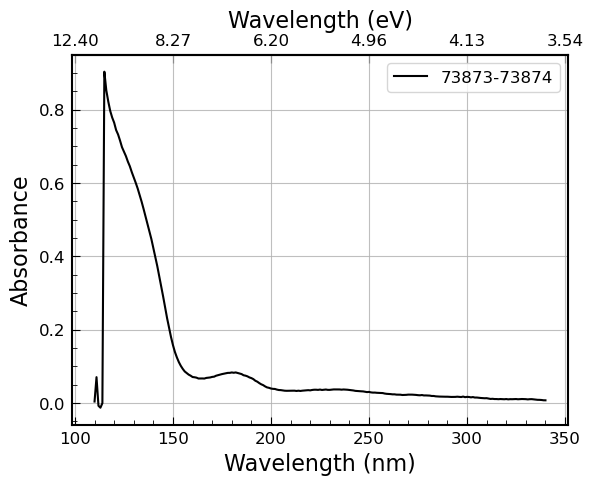

In [10]:
path = "./data/SergioIoppolo-November2023/20231104  hexane/"
bkgd_fname1 = path + "R73861.d01"
sample_fname1 = path + "R73873.d01"

bkgd_fname2 = path + "R73861.d02"
sample_fname2 = path + "R73873.d02"

# action, pressing "ok" in the edit window:

spec1 = tools.Spectrum()
spec1.change_name("73873")
spec1.add_bkgd(bkgd_fname1)
spec1.add_bkgd(bkgd_fname2)
spec1.add_sample(sample_fname1)
spec1.add_sample(sample_fname2)
spec1.change_color("#000001")
spec1.change_offset(0.0)
spec1.average_scans()
#tools.plot_absorbance([test_spectrum])


bkgd_fname1 = path + "R73862.d01"
sample_fname1 = path + "R73874.d01"

bkgd_fname2 = path + "R73862.d02"
sample_fname2 = path + "R73874.d02"

# action, pressing "ok" in the edit window:

spec2 = tools.Spectrum()
spec2.change_name("73874")
spec2.add_bkgd(bkgd_fname1)
spec2.add_bkgd(bkgd_fname2)
spec2.add_sample(sample_fname1)
spec2.add_sample(sample_fname2)
spec2.change_color("#000001")
spec2.change_offset(0.0)
spec2.average_scans()
#tools.plot_absorbance([test_spectrum])

tester = tools.StichedSpectrum(spec1, spec2)

tools.plot_absorbance([tester])

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


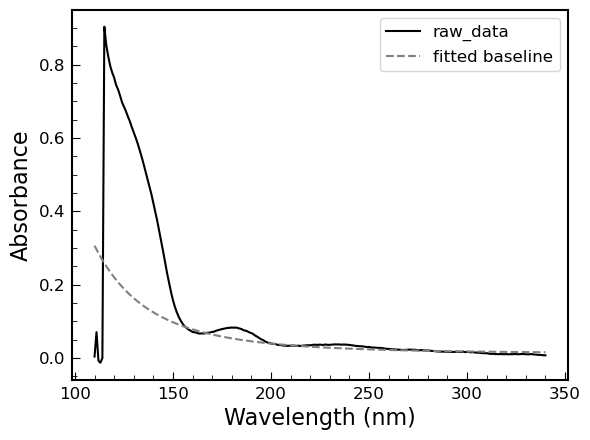

In [72]:
# selecting the right region to fit in makes a huge difference here!!!
tester.subtract_baseline([(157, 165), (190, 210), (250, 270),
                          (280, 290), (315, 320), (330, 340)],
                         p0=[10**0, 0, 0])

fig, ax = plt.subplots(1, 1)
ax.plot(tester.data['wavelength'], tester.data['raw_absorbance'],
        color='black', label='raw_data')
ax.plot(tester.data['wavelength'], tester.data['baseline'],
        color='grey', label='fitted baseline', linestyle = '--')
ax.legend()
ax.set_xlabel("Wavelength (nm)")
ax.set_ylabel("Absorbance");

In [73]:
tester.baseline_p

array([1.01111966e+00, 1.23738238e-02, 4.25339584e+07])

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


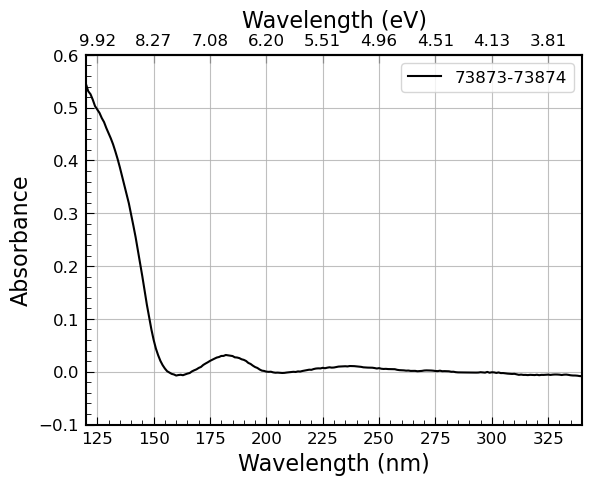

In [78]:
tools.plot_absorbance([tester], xlim=[120, 340], ylim=[-0.1, 0.6])

/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


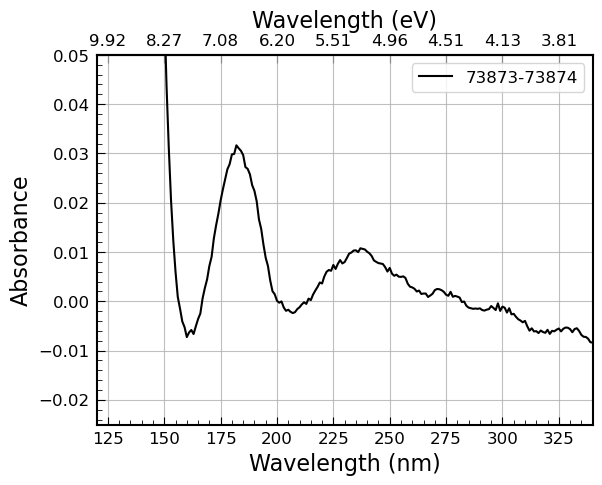

In [82]:
tools.plot_absorbance([tester], xlim=[120, 340], ylim=[-0.025, 0.05])

In [1]:
import gaussians
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('./au-uv.mplstyle')

In [2]:
x = np.linspace(-20, 20, 400)
y1 = gaussians.g1(x, 1,0,2)
y2 = gaussians.g2(x, 2,-4,2, 1,3,2)
y3 = gaussians.g3(x, 2,-4,2, 1,2,2, 0.5,8,2)
y4 = gaussians.g4(x, 2,-4,2, 1,2,2, 0.5,8,2, 1,5,2)

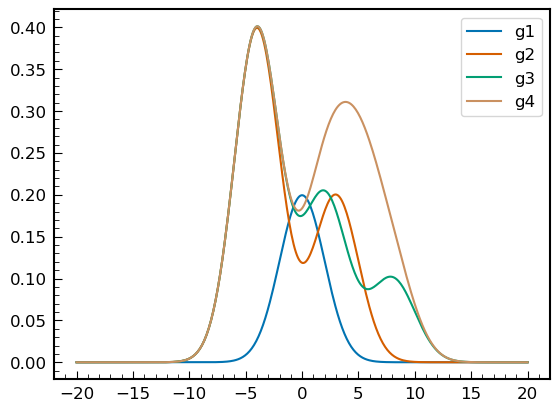

In [3]:
fig, ax = plt.subplots(1, 1)

ax.plot(x, y1, label="g1")
ax.plot(x, y2, label="g2")
ax.plot(x, y3, label="g3")
ax.plot(x, y4, label="g4")

ax.legend()

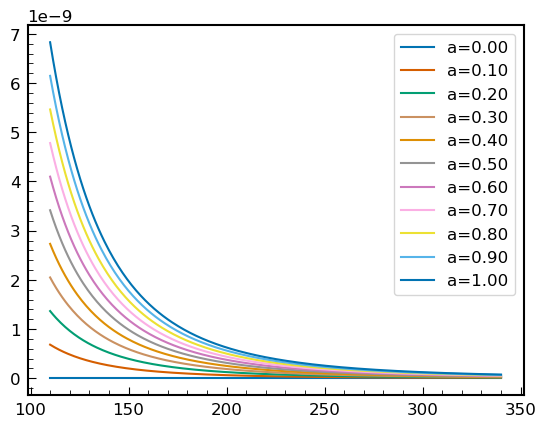

In [115]:
x = np.linspace(110, 340, 300)

a_list = np.linspace(0, 1, 11)

#ys = []
fig, ax = plt.subplots(1, 1)

for a in a_list:
    y = tools.scattering_baseline(x, a, 0, 1)
    ax.plot(x, y, label="a={0:.2f}".format(a))
    
ax.legend()

ask Zu for the old cyanopolyynes data, especially the methanol. Ann did methanol observations recently and you can apply the same analysis to that and the old ones, to compare across the different setups. The old data were acquired in the UK.

## Fitting with the Gaussians

In [1]:
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gaussians
from scipy.optimize import curve_fit
plt.style.use('./au-uv.mplstyle')
# keep things reproducable
random.seed(31415)

In [7]:
path = "./calibrated_data/SergioIoppolo-November2023/propane/140KPropane+50s1keVe-.csv"
df = pd.read_csv(path)
df['absorbance'] = df['absorbance'] - df['absorbance'].iloc[-1]

In [41]:
# we only want to fit where the data are good
fit_df = df[df['wavelength'] > 120].copy()

# do the fit

gs = [gaussians.g1, gaussians.g2, gaussians.g3, gaussians.g4, gaussians.g5,
      gaussians.g6]
guesses = [6,135,20, 3,185,20, 2,240,20, 0.4,270,20, 0.4,290,20, 0.1,325,10]
for n in range(1, 7):
    print(n)
    try:
        p, pcov = curve_fit(f=gs[n-1], xdata=fit_df['wavelength'], 
                            ydata=fit_df["absorbance"],
                            p0=guesses[:n*3])
        fit_df['best_fit'] = gs[n-1](fit_df['wavelength'], *p)
        redchi2 = ((fit_df['best_fit'] - fit_df['absorbance'])**2).sum()
        print(redchi2)
        if redchi2 > old_chi2:
            n = n-1
            break
        else:
            old_chi2 = redchi2

    except:
        continue
        
print(n)
p, pcov = curve_fit(f=gs[n-1], xdata=fit_df['wavelength'], 
                    ydata=fit_df["absorbance"],
                    p0=guesses[:n*3])
fit_df['best_fit'] = gs[n-1](fit_df['wavelength'], *p)

"""# extract the peak positions
peaks = []
for i in range(1, len(p), 3):
    peaks.append(p[i])"""

1
0.008445044641844358
2
0.003571271667974589
3
0.0007490132555875889
4
0.0002849739910233398
5
0.00025870773643126455
6
0.0002360392940310417
6


'# extract the peak positions\npeaks = []\nfor i in range(1, len(p), 3):\n    peaks.append(p[i])'

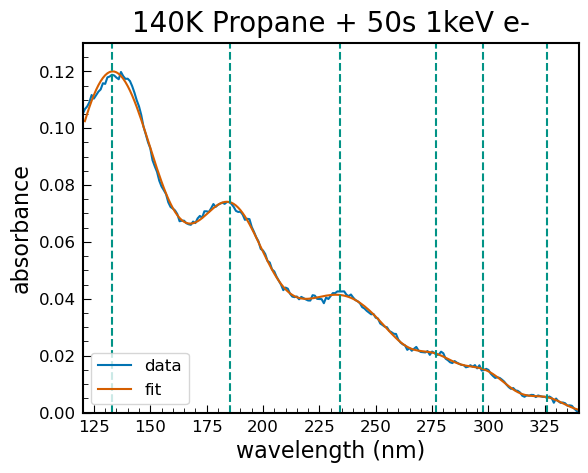

In [11]:
fig, ax = plt.subplots(1, 1)

ax.plot(df['wavelength'], df['absorbance'], label="data")
ax.plot(fit_df['wavelength'], fit_df['best_fit'], label="fit")

for peak in peaks:
    ax.axvline(peak, linestyle='--', color='xkcd:teal')

#ax.grid()
ax.legend()
ax.set_ylabel("absorbance")
ax.set_xlabel("wavelength (nm)")
ax.set_title("140K Propane + 50s 1keV e-")
ax.set_xlim(120, 340)
ax.set_ylim(0, 0.13);

In [63]:
path = "./calibrated_data/SergioIoppolo-November2023/propane/Propane+50s1keVe-.csv"
df = pd.read_csv(path)
df['absorbance'] = df['absorbance'] - df['absorbance'].iloc[-1]

In [67]:
# we only want to fit where the data are good
fit_df = df[df['wavelength'] > 120].copy()

# do the fit
# this method is computationally expensive and bad. It will be fixed in
# the future... :/
gs = [gaussians.g1, gaussians.g2, gaussians.g3,
      gaussians.g4, gaussians.g5, gaussians.g6]
guesses = [6,135,20, 3,185,20, 2,240,20,
           0.4,270,20, 0.4,290,20, 0.1,325,10]
fit_results = []
old_chi2 = 1000
for n in range(1, 7):
    print(n)
    try:
        p, pcov = curve_fit(f=gs[n-1], xdata=fit_df['wavelength'], 
                            ydata=fit_df["absorbance"],
                            p0=guesses[:n*3])
        best_fit = gs[n-1](fit_df['wavelength'], *p)
        redchi2 = ((best_fit - fit_df['absorbance'])**2).sum()
        print("success!")
        fit_results.append({'redchi2':redchi2, 'n':n, 'best_fit':best_fit})
        """if redchi2 > old_chi2:
            # the previous n gaussians was better, stop and use that
            n = n-1
            break
        else:
            old_chi2 = redchi2"""
    except:
        continue
print("stopped, n={0}".format(n))

best_chi2 = 1000
best_i = 0
for i in range(0, len(fit_results)):
    if fit_results[i]['redchi2'] < best_chi2:
        best_i = i
        best_chi2 = fit_results[i]['redchi2']
        
print(best_i, best_chi2)

fit_df['best_fit'] = fit_results[best_i]['best_fit']

# add the best fit to self.data, but if it already exists
# get rid of it first.
"""if 'best_fit' in self.data:
    self.data = self.data.drop(columns=['best_fit'])"""
df = df.merge(fit_df, how='left')

# un-offset the fit, to match self.data['absorbance'] and give accurate
# residuals
"""self.data['best_fit'] = self.data['best_fit'] - self.offset"""

# calculate residuals
df['residuals'] = df['absorbance']-df['best_fit']

# extract the peak positions
peaks = []
for i in range(1, len(p), 3):
    peaks.append(p[i])

residuals = None

# save the individual gaussians that make up the fit
fit_components = []
ps = [p[i * 3:(i + 1) * 3] for i in range((len(p) + 3 - 1) // 3 )]
for params in ps:
    # each item in ps is a list of three numbers, for one gaussian
    this_gaussian = gaussians.g1(df['wavelength'], *params)
    fit_components.append({'parameters':params,
                            'absorbance':this_gaussian})

1
2
success!
3
success!
4
success!
5


/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


success!
6
stopped, n=6
2 0.0016342906759547482


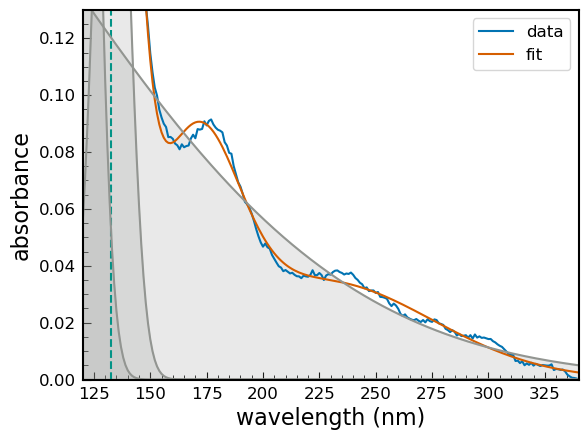

In [66]:
fig, ax = plt.subplots(1, 1)

ax.plot(df['wavelength'], df['absorbance'], label="data")
ax.plot(fit_df['wavelength'], fit_df['best_fit'], label="fit")

for peak in peaks:
    ax.axvline(peak, linestyle='--', color='xkcd:teal')
    
for component in fit_components:
    ax.plot(df['wavelength'],
             component['absorbance'],
             color='xkcd:grey', linestyle='-')
    ax.fill_between(df['wavelength'], 0,
                     component['absorbance'],
                     color='xkcd:grey', alpha=.2)

#ax.grid()
ax.legend()
ax.set_ylabel("absorbance")
ax.set_xlabel("wavelength (nm)")
#ax.set_title("140K Propane + 50s 1keV e-")
ax.set_xlim(120, 340)
ax.set_ylim(0, 0.13);

In [1]:
import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# keep things reproducable
random.seed(31415)
# define colors for plotting
colors = ["#dcdcdc", "#2f4f4f", "#a52a2a", "#191970", "#006400", "#bdb76b", "#9acd32",
"#66cdaa", "#ff0000", "#ff8c00", "#ffd700", "#c71585", "#0000cd", "#00ff00",
"#00fa9a", "#00bfff", "#ff00ff", "#dda0dd", "#7b68ee", "#ffa07a"]

def build_spectra(path, bkgd_short1, bkgd_short2, bkgd_long1, bkgd_long2,
                  sample_short1, sample_short2, sample_long1, sample_long2,
                  color="#000001", name=None):
    """
    Builds the spectra as appropriate for this experiment
    """
    # build short spectrum
    spec1 = tools.Spectrum()
    spec1.change_name(sample_short1[-9:-4])
    spec1.add_bkgd(bkgd_short1)
    spec1.add_bkgd(bkgd_short2)
    spec1.add_sample(sample_short1)
    spec1.add_sample(sample_short2)
    spec1.change_color(color)
    spec1.change_offset(0.0)
    spec1.average_scans()

    # build long spectrum
    spec2 = tools.Spectrum()
    spec2.change_name(sample_long1[-9:-4])
    spec2.add_bkgd(bkgd_long1)
    spec2.add_bkgd(bkgd_long2)
    spec2.add_sample(sample_long1)
    spec2.add_sample(sample_long2)
    spec2.change_color(color)
    spec2.change_offset(0.0)
    spec2.average_scans()

    stiched = tools.StichedSpectrum(spec1, spec2)
    if name:
        stiched.change_name(name)
    return stiched

path = "./raw_data/SergioIoppolo-November2023/20231101/"
#save_path = "./calibrated_data/SergioIoppolo-November2023/propane/"

bkgd_short1 = path + "R73773.d01"
bkgd_short2 = path + "R73773.d02"
bkgd_long1 = path + "R73775.d01"
bkgd_long2 = path + "R73775.d02"

sample_short1 = path + "R73800.d01"
sample_short2 = path + "R73800.d02"
sample_long1 = path + "R73801.d01"
sample_long2 = path + "R73801.d02"

spec = build_spectra(path, bkgd_short1, bkgd_short2, bkgd_long1, bkgd_long2,
                        sample_short1, sample_short2, sample_long1, sample_long2,
                        color=colors[7], name="50K Propane + 50s 1keV e-")

50K Propane + 50s 1keV e-
Attempting fit with 6 gaussians
success!
The best fit was achieved with 6 gaussians and a reduced chi2 of 0.00


/home/lars/miniconda3/envs/snpy2/lib/python3.10/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


<Axes: ylabel='Absorbance'>

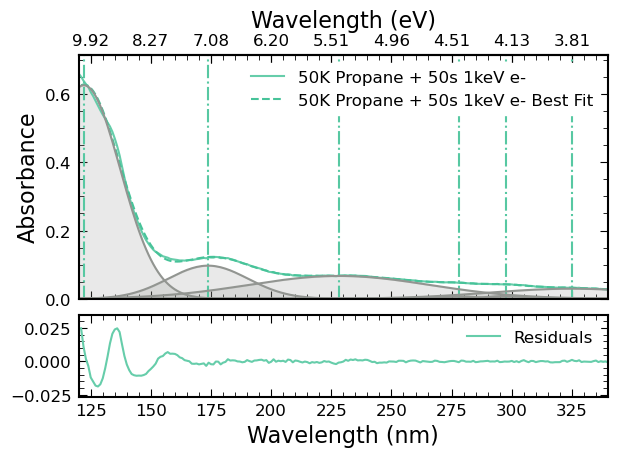

In [2]:
#this_save_path = save_path + spec.name.replace(" ", "")
print(spec.name)

guesses = [{'lower':0, 'guess':4, 'upper':25},   # amplitude
           {'lower':110, 'guess':122, 'upper':140},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':3, 'upper':25},   # amplitude
           {'lower':165, 'guess':173, 'upper':190},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':2, 'upper':25},   # amplitude
           {'lower':225, 'guess':240, 'upper':250},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':0.4, 'upper':5},   # amplitude
           {'lower':275, 'guess':276, 'upper':278},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':0.4, 'upper':5},   # amplitude
           {'lower':297, 'guess':298, 'upper':299},   # center
           {'lower':0, 'guess':20, 'upper':340},   # standard deviation
           
           {'lower':0, 'guess':0.1, 'upper':5},   # amplitude
           {'lower':325, 'guess':326, 'upper':327},   # center
           {'lower':0, 'guess':10, 'upper':340},   # standard deviation
          ]

p0 = []
lower_bounds = []
upper_bounds = []
for guess in guesses:
    p0.append(guess['guess'])
    lower_bounds.append(guess['lower'])
    upper_bounds.append(guess['upper'])
    
bounds = (lower_bounds, upper_bounds)

spec.fit_peaks(verbose=True, ng_lower=6, ng_upper=7, p0=p0, bounds=bounds)
tools.plot_fit(spec, plot_peaks=True, xlim=(120, 340),
               ylim=(0, spec.data[spec.data['wavelength']>120]['absorbance'].max()*1.1),
               plot_fit_components=True)

In [3]:
spec.data

,wavelength,absorbance,best_fit,residuals
0,110.0,-0.032185,NaN,NaN
1,111.0,-0.169402,NaN,NaN
2,112.0,-0.127960,NaN,NaN
3,113.0,-0.167940,NaN,NaN
4,114.0,-0.000580,NaN,NaN
...,...,...,...,...
226,336.0,0.028791,0.029244,-0.000452
227,337.0,0.029044,0.028891,0.000153
228,338.0,0.028235,0.028524,-0.000289
229,339.0,0.028157,0.028141,0.000015


In [4]:
import numpy as np
import gaussians
import tools
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [6]:
f = lambda x, a, *p: a*x + gaussians.g2(x, *p)

In [12]:
p0 = [1,-3,2, 2,1,1]
a = 0.01
x = np.linspace(-10, 10, 100)
y = f(x, a, *p0)

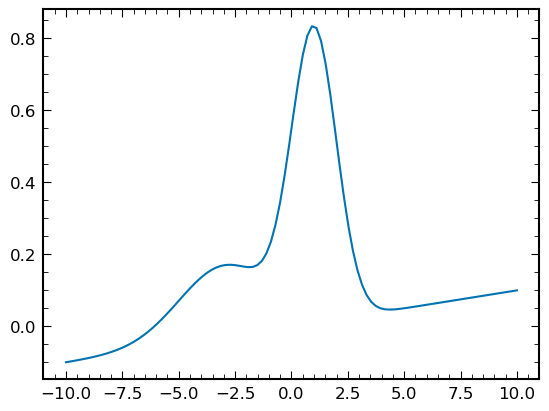

In [13]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y)

In [65]:
f2 = lambda comps, *A: sum([a*comp for a, comp in zip(A, comps)])
f3 = lambda comps, *A: [a*comp for a, comp in zip(A, comps)]

In [66]:
c1 = np.linspace(0, 10, 11)
c2 = np.linspace(10, 20, 11)
c3 = np.linspace(-10, 0, 11)
a1 = 5
a2 = 2
a3 = 1
As = [a1, a2, a3]
Cs = [c1, c2, c3]

thing = f2(Cs, *As)

In [67]:
thing

array([10., 18., 26., 34., 42., 50., 58., 66., 74., 82., 90.])

In [40]:
for x in thing:
    print(x)

[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50.]
[20. 22. 24. 26. 28. 30. 32. 34. 36. 38. 40.]


In [43]:
[sum(x) for x in zip([0, 1, 2], [2, 4, 6])]

[2, 5, 8]

In [58]:
sum(thing)

array([20., 27., 34., 41., 48., 55., 62., 69., 76., 83., 90.])

In [73]:
f4 = lambda x, comps, P, A: sum([a*comp for a, comp in zip(A, comps)]) + gaussians.g2(x, *P)

In [77]:
p0 = [1,-3,2, 2,1,1]

x = np.linspace(-10, 10, 100)
a1 = 0.01
a2 = 0.02
a3 = -0.05
As = [a1, a2, a3]

y = f4(x, [x, x, x], p0, As)

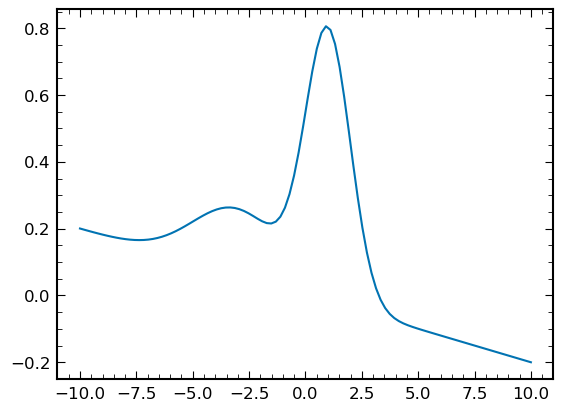

In [78]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y)